In [2]:
#Group Project with Camha, Decker, and Kim (special tanks for creating the sample set). 
import pandas as pd
import seaborn as sns
import numpy as np
hr = pd.read_csv('HR_test.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['gpms_rating', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,3,1,1,180,20,0,0,0,Machine_Learning,medium
1,3,1,1,180,19,0,0,0,Machine_Learning,medium
2,2,1,1,180,19,0,0,0,Machine_Learning,medium
3,3,1,1,180,18,0,0,0,Machine_Learning,medium
4,3,1,1,180,17,0,0,0,Machine_Learning,medium


In [3]:
hr=hr.rename(columns = {'sales':'department'})

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 10 columns):
gpms_rating              829 non-null int64
last_evaluation          829 non-null int64
number_project           829 non-null int64
average_monthly_hours    829 non-null int64
time_spend_company       829 non-null int64
Work_accident            829 non-null int64
left                     829 non-null int64
promotion_last_5years    829 non-null int64
department               829 non-null object
salary                   829 non-null object
dtypes: int64(8), object(2)
memory usage: 64.8+ KB


In [5]:
#Our data is pretty clean and has no missing value

In [6]:
#The data contains 829 employees, 9 features + 1 target 

In [7]:
hr.shape

(829, 10)

In [8]:
hr.describe()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,829.000000,829.000000,829.000000,829.0,829.000000,829.0,829.000000,829.000000
mean,2.223160,0.924005,1.080820,180.0,2.939686,0.0,0.080820,0.460796
std,1.063057,0.265150,0.599502,0.0,2.787781,0.0,0.272723,1.007206
min,0.000000,0.000000,1.000000,180.0,0.000000,0.0,0.000000,0.000000
25%,2.000000,1.000000,1.000000,180.0,1.000000,0.0,0.000000,0.000000
50%,3.000000,1.000000,1.000000,180.0,2.000000,0.0,0.000000,0.000000
75%,3.000000,1.000000,1.000000,180.0,5.000000,0.0,0.000000,0.000000
max,4.000000,1.000000,15.000000,180.0,21.000000,0.0,1.000000,4.000000


In [9]:
hr['department'].unique()

array(['Machine_Learning', 'Tribal_Network', 'Bigdata', 'Javascript',
       'HTML', 'Matplot_Lib', 'CSS', 'Python', 'SQL', 'Numpy',
       'Data_Analytics', 'Data_Science'], dtype=object)

In [10]:
#Find out the number of employees who left the company and those who didn't
#0 is stayed, 1 is left

In [11]:
hr['left'].value_counts()

0    762
1     67
Name: left, dtype: int64

In [12]:
#Get a sense of the numbers across these two classes. Employees that are active and employees that left

In [13]:
#Since we don't have the satisfaction_level, average_montly_hours, Work_accident; our only observation is the promotion_last_5years 

In [14]:
# Hypothesis is employees who were promoted in the last 5 years are less likely to leave than those who did not get a promotion in the last five years.

In [15]:
hr.groupby('left').mean()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,2.282152,0.919948,1.083990,180.0,2.956693,0.0,0.494751
1,1.552239,0.970149,1.044776,180.0,2.746269,0.0,0.074627


In [16]:
hr.groupby('department').mean()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
Bigdata,1.949153,0.830508,1.050847,180.0,1.966102,0.0,0.101695,0.169492
CSS,2.473684,1.000000,1.000000,180.0,3.105263,0.0,0.052632,0.684211
Data_Analytics,2.169492,0.898305,1.237288,180.0,2.864407,0.0,0.101695,0.440678
Data_Science,1.875000,0.833333,1.000000,180.0,2.958333,0.0,0.083333,0.625000
HTML,2.333333,0.944444,1.000000,180.0,2.222222,0.0,0.000000,0.277778
Javascript,2.666667,1.000000,1.000000,180.0,1.500000,0.0,0.166667,0.166667
Machine_Learning,2.419355,0.946237,1.000000,180.0,4.301075,0.0,0.010753,0.591398
Matplot_Lib,2.395062,0.938272,1.098765,180.0,3.790123,0.0,0.024691,0.555556
Numpy,1.406250,0.718750,1.531250,180.0,2.718750,0.0,0.093750,0.531250


In [17]:
hr.groupby('salary').mean()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,2.076923,0.869231,1.169231,180.0,1.969231,0.0,0.015385,0.269231
low,2.103030,0.945455,1.048485,180.0,3.115152,0.0,0.175758,0.557576
medium,2.295880,0.930712,1.069288,180.0,3.121723,0.0,0.067416,0.477528


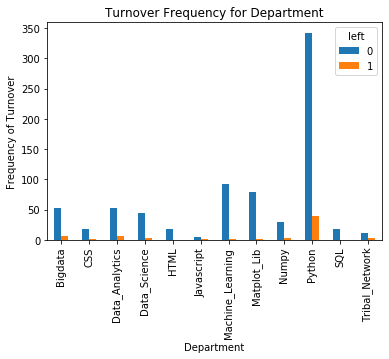

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart.png')

In [19]:
#We then check to see if salary level is a good indicator the outcome of the employees leaving

In [20]:
print(hr.salary.unique())

['medium' 'low' 'high']


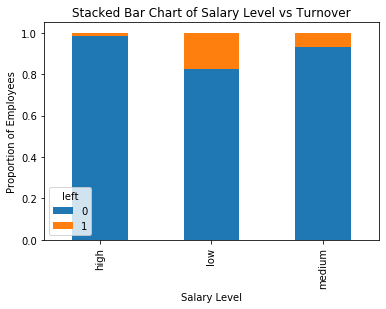

In [21]:
table=pd.crosstab([hr.salary], [hr.left])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart.png')

In [22]:
#We see that from low to high, there was a observable decrease in people leaving
#Create dummy variable for categorical variables for modelings

In [23]:
hr.head()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,3,1,1,180,20,0,0,0,Machine_Learning,medium
1,3,1,1,180,19,0,0,0,Machine_Learning,medium
2,2,1,1,180,19,0,0,0,Machine_Learning,medium
3,3,1,1,180,18,0,0,0,Machine_Learning,medium
4,3,1,1,180,17,0,0,0,Machine_Learning,medium


In [24]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [25]:
hr.head()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_Javascript,department_Machine_Learning,department_Matplot_Lib,department_Numpy,department_Python,department_SQL,department_Tribal_Network,salary_high,salary_low,salary_medium
0,3,1,1,180,20,0,0,0,Machine_Learning,medium,...,0,1,0,0,0,0,0,0,0,1
1,3,1,1,180,19,0,0,0,Machine_Learning,medium,...,0,1,0,0,0,0,0,0,0,1
2,2,1,1,180,19,0,0,0,Machine_Learning,medium,...,0,1,0,0,0,0,0,0,0,1
3,3,1,1,180,18,0,0,0,Machine_Learning,medium,...,0,1,0,0,0,0,0,0,0,1
4,3,1,1,180,17,0,0,0,Machine_Learning,medium,...,0,1,0,0,0,0,0,0,0,1


In [26]:
"""
The actual categorical variable (Department and Salary) needs to be 
removed once the dummy variables been created so that there are integers for the model
"""


'\nThe actual categorical variable (Department and Salary) needs to be \nremoved once the dummy variables been created so that there are integers for the model\n'

In [27]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [28]:
hr.head()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_Bigdata,department_CSS,...,department_Javascript,department_Machine_Learning,department_Matplot_Lib,department_Numpy,department_Python,department_SQL,department_Tribal_Network,salary_high,salary_low,salary_medium
0,3,1,1,180,20,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3,1,1,180,19,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,1,1,180,19,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3,1,1,180,18,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,3,1,1,180,17,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [29]:
hr.columns.values
#now we separately have all the columns ready for initial modeling

array(['gpms_rating', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_Bigdata',
       'department_CSS', 'department_Data_Analytics',
       'department_Data_Science', 'department_HTML',
       'department_Javascript', 'department_Machine_Learning',
       'department_Matplot_Lib', 'department_Numpy', 'department_Python',
       'department_SQL', 'department_Tribal_Network', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [30]:
#target for model is turnover, the category "left"
#this will take the rest of the columns into X
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [31]:
X

['gpms_rating',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_Bigdata',
 'department_CSS',
 'department_Data_Analytics',
 'department_Data_Science',
 'department_HTML',
 'department_Javascript',
 'department_Machine_Learning',
 'department_Matplot_Lib',
 'department_Numpy',
 'department_Python',
 'department_SQL',
 'department_Tribal_Network',
 'salary_high',
 'salary_low',
 'salary_medium']

In [32]:
#Recursive feature elimination (RFE) is a feature selection method that fits a model and removes 
#the weakest feature (or features) until the specified number of features is reached. 
#this will allow use to find the highest factors for modeling

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False  True  True False False False False
  True  True  True False False  True False  True  True False]
[ 1  1 10 12 11 13  1  1  6  7  3  5  1  1  1  4  2  1  8  1  1  9]


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [34]:
from pprint import pprint
#factor list 
X
dict_focus = dict(zip(X,rfe.support_))
dict_focus1 = dict(zip(X,rfe.ranking_))
pprint(dict_focus)
pprint(dict_focus1)

get_list_factors = []

for key,value in dict_focus1.items():
    if value == 1:
        get_list_factors.append(key)

{'Work_accident': False,
 'average_monthly_hours': False,
 'department_Bigdata': True,
 'department_CSS': False,
 'department_Data_Analytics': False,
 'department_Data_Science': False,
 'department_HTML': False,
 'department_Javascript': True,
 'department_Machine_Learning': True,
 'department_Matplot_Lib': True,
 'department_Numpy': False,
 'department_Python': False,
 'department_SQL': True,
 'department_Tribal_Network': False,
 'gpms_rating': True,
 'last_evaluation': True,
 'number_project': False,
 'promotion_last_5years': True,
 'salary_high': True,
 'salary_low': True,
 'salary_medium': False,
 'time_spend_company': False}
{'Work_accident': 13,
 'average_monthly_hours': 12,
 'department_Bigdata': 1,
 'department_CSS': 6,
 'department_Data_Analytics': 7,
 'department_Data_Science': 3,
 'department_HTML': 5,
 'department_Javascript': 1,
 'department_Machine_Learning': 1,
 'department_Matplot_Lib': 1,
 'department_Numpy': 4,
 'department_Python': 2,
 'department_SQL': 1,
 'departme

In [35]:
#any rank as 1 will be used for modeling
print(get_list_factors)

['gpms_rating', 'last_evaluation', 'promotion_last_5years', 'department_Bigdata', 'department_Javascript', 'department_Machine_Learning', 'department_Matplot_Lib', 'department_SQL', 'salary_high', 'salary_low']


In [36]:
#for logistic regression, we will use the factors determined from the RFE
X_factors=hr[get_list_factors]
y=hr['left']

In [37]:
#LOGISTIC REGRESSION

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.3, random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.928


In [41]:
#Random Forests or Random decision forests 

In [42]:
#we also compared this to random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.944


In [44]:
#Support Vector Machine. Given labeled training data (supervised learning), 
#the algorithm outputs an optimal hyperplane which categorizes new examples.

In [45]:
#A supervised machine learning algorithm that can be employed for both classificatin and regression purposes.

In [46]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.912


In [48]:
print(X_train)

     gpms_rating  last_evaluation  promotion_last_5years  department_Bigdata  \
127            1                1                      1                   1   
453            3                1                      0                   0   
443            3                1                      0                   0   
819            3                1                      0                   0   
454            3                1                      0                   0   
144            3                1                      0                   1   
214            2                1                      1                   0   
301            2                1                      0                   0   
21             3                1                      0                   0   
596            2                1                      0                   0   
250            3                1                      0                   0   
243            3                1       

In [49]:
#Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. 
#We are using 10-fold Cross-Validation to train our Random Forest model.
#Validation is probably in one of most important techniques that a data scientist use as there is always a need to
#validate the stability of the machine learning model-how well it would generalize to new data. It needs to be sure that 
#the model has got most of the patterns from the data correct, and its not picking up too much on the noise, 
#or in other words its low on bias and variance.

In [50]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.919


In [51]:
#We are using 10=fold Cross-Validation to train our Random Forest model.It is a meta estimator that fits a 
#number of decision treee classifiers on a various sub-samples of the dataset and uses averaging to improve 
#the predictive accuracuy and control over-fitting.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.919


In [53]:
#Precision and recall
#We construct confusion matrix to visualize predictions made by a classifier and evaluate 
#the accuracy of a classification.

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       227
           1       1.00      0.36      0.53        22

    accuracy                           0.94       249
   macro avg       0.97      0.68      0.75       249
weighted avg       0.95      0.94      0.93       249



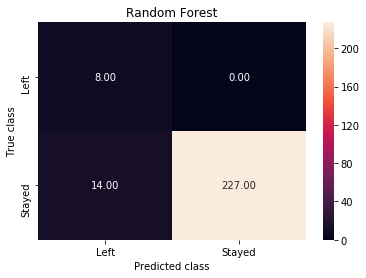

In [55]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest.png')

In [56]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       227
           1       0.00      0.00      0.00        22

    accuracy                           0.91       249
   macro avg       0.46      0.50      0.48       249
weighted avg       0.83      0.91      0.87       249



/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


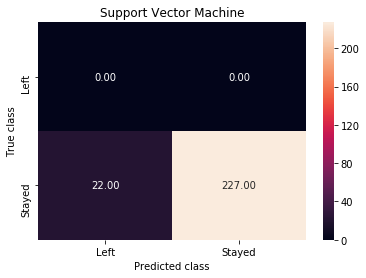

In [57]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine.png')

In [58]:
#based on the prediction, SVC is probably not a good model for this data set

In [59]:
#In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, 
#we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the 
#multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. 
#It is one of the most important evaluation metrics for checking any classification model’s performance. 
#It is also written as AUROC (Area Under the Receiver Operating Characteristics)

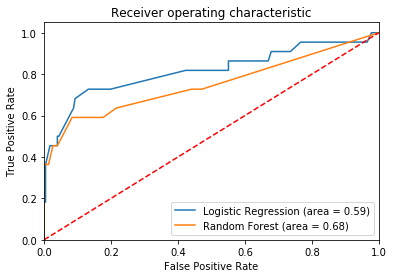

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

In [61]:
feature_labels = np.array(get_list_factors)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_SQL-1.61%
department_Javascript-2.98%
department_Matplot_Lib-3.81%
department_Machine_Learning-3.96%
department_Bigdata-7.04%
salary_high-8.19%
salary_low-10.53%
last_evaluation-13.87%
promotion_last_5years-15.84%
gpms_rating-32.18%


In [62]:
"""
based on the percentages of likelyhood using random forest, gpms rating 
(annual performace points) is the highest determinator of leaving the company
"""

'\nbased on the percentages of likelyhood using random forest, gpms rating \n(annual performace points) is the highest determinator of leaving the company\n'

In [63]:
predictions=rf.predict(X_test)

In [64]:
#confusion matrix without the graph
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[227   0]
 [ 14   8]]


In [65]:
#shows predictions of each employee versus whether they left or not
df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
df

,Prediction,Actual
826,0,0
103,0,1
8,0,0
258,0,0
627,0,0
356,0,0
294,0,0
656,0,0
520,0,0
316,0,0


In [66]:
#shows all predictions where the model shows they left
df.loc[df["Prediction"]==1]

,Prediction,Actual
701,1,1
101,1,1
456,1,1
795,1,1
809,1,1
494,1,1
531,1,1
747,1,1


In [67]:
#shows all the employees that actually left
df.loc[df["Actual"]==1]

,Prediction,Actual
103,0,1
538,0,1
691,0,1
701,1,1
101,1,1
549,0,1
456,1,1
283,0,1
578,0,1
412,0,1
